In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('banking_updated.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [8]:

def get_unknown_value(data, column):
    count = 0
    for row in data[column]:
        if row == 'unknown':
            count += 1
    return count
count_list = []
for column in data.columns[1:7]:
    unknown = get_unknown_value(data, column)
    count_list.append(unknown)


In [9]:

count_list = []
for column in data.columns[1:7]:
    unknown = get_unknown_value(data, column)
    count_list.append(unknown)


Text(0.5, 1.0, 'Unknown Values for Each Features')

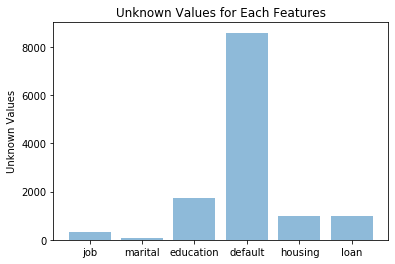

In [10]:
objects = ('job', 'marital', 'education', 'default', 'housing', 'loan')
y_pos = np.arange(len(objects))
plt.bar(y_pos, count_list, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Unknown Values')
plt.title('Unknown Values for Each Features')

In [11]:
data.drop('default', axis=1, inplace = True)

In [13]:
for column in data.columns[1:8]:
    data[column] = data[column].where(data[column] != 'unknown', data[column].mode()[0])

In [14]:
#label encoder
from sklearn import preprocessing
from numpy import array
enc = preprocessing.OneHotEncoder(sparse=False)
for column in data.columns[1:10]:
    values = array(data[column])
    label_encoder = preprocessing.LabelEncoder()
    data[column] = label_encoder.fit_transform(values)


In [15]:
import numpy as np
data.drop('poutcome', axis=1, inplace = True)
mapping = {label:idx for idx, label in enumerate(np.unique(data['y']))}
data['y'] = data['y'].map(mapping)
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,0,0,1,2,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,6,0,0,0,7,0,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,1,0,0,4,2,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,1,0,0,1,0,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [16]:
y = data['y']
X = data.drop('y', axis=1)

In [17]:
X = X.drop('duration', axis = 1)


In [18]:
from sklearn.model_selection import train_test_split
y = data['y']
X = X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

In [20]:
def test_max_depth(X_train, y_train, X_test, y_test):
    pred_score = []
    for i in range(1, 30):
        clf = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = 3)
        clf = clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        acc = accuracy_score(y_test, predict, normalize = True)
        pred_score.append(acc)
    return pred_score


In [21]:
def test_min_split(X_train, y_train, X_test, y_test):
    pred_score = []
    for i in range(2, 15):
        clf = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = i)
        clf = clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        acc = accuracy_score(y_test, predict, normalize = True)
        pred_score.append(acc)
    return pred_score

In [22]:
acc_DT = test_max_depth(X_train, y_train, X_test, y_test)

In [23]:
acc_DT_sample = test_min_split(X_train, y_train, X_test, y_test)


Text(0, 0.5, 'Classification Accuracy')

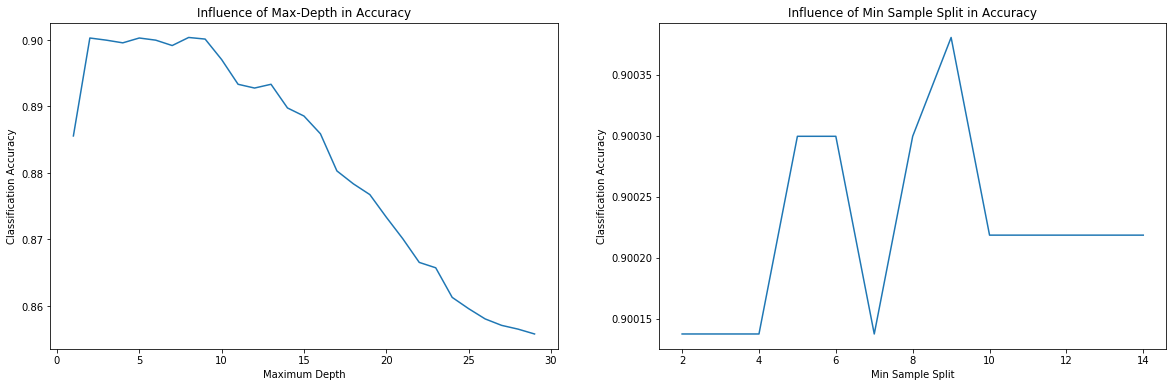

In [24]:
from random import randint
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
x = range(1, 30)
s_plot = ax1.plot(x, acc_DT)
ax1.set_title('Influence of Max-Depth in Accuracy')
ax1.set_xlabel('Maximum Depth')
ax1.set_ylabel('Classification Accuracy')

x1 = range(2, 15)
s_plot = ax2.plot(x1, acc_DT_sample)
ax2.set_title('Influence of Min Sample Split in Accuracy')
ax2.set_xlabel('Min Sample Split')
ax2.set_ylabel('Classification Accuracy')